## Working on ExperimentLoader

In [1]:
import sys, json, os
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

PROJECT_DIR = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER"
SRC_DIR = str(Path(PROJECT_DIR) / "src")
if SRC_DIR not in sys.path:
    sys.path.insert(0, SRC_DIR)

from multiomic_transformer.models.model import MultiomicTransformer
from multiomic_transformer.datasets.dataset_refactor import MultiChromosomeDataset, SimpleScaler, fit_simple_scalers
import multiomic_transformer.utils.experiment_loader as experiment_loader

In [133]:
from importlib import reload

reload(experiment_loader)

<module 'multiomic_transformer.utils.experiment_loader' from '/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/src/multiomic_transformer/utils/experiment_loader.py'>

In [132]:
exp = experiment_loader.ExperimentLoader(
    experiment_dir = "/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/",
    experiment_name="Macrophage_buffer_2_best_settings",
    model_num=1,
)

exp.load_trained_model("trained_model.pt")

In [28]:
for k, v in exp.model_training_params.items():
    print(f"{k}: {v}")

allowed_samples: None
epochs: 250
batch_size: 16
grad_accum_steps: 1
use_grad_accum: True
use_grad_ckpt: True
d_model: 192
num_heads: 4
num_layers: 3
d_ff: 768
dropout: 0.1
use_shortcut: False
use_dist_bias: True
use_motif_mask: True
motif_mask_threshold: 0.0
motif_prior_scale: 0.0
shortcut_l1: 0.0
shortcut_l2: 0.0
shortcut_dropout: 0.0
shortcut_topk: None
lr: 0.00025
genes: 11340
windows: 69548
tfs: 985
metacells: 46139


Running forward pass to get predicted vs true TG expression for a subset of test batches...


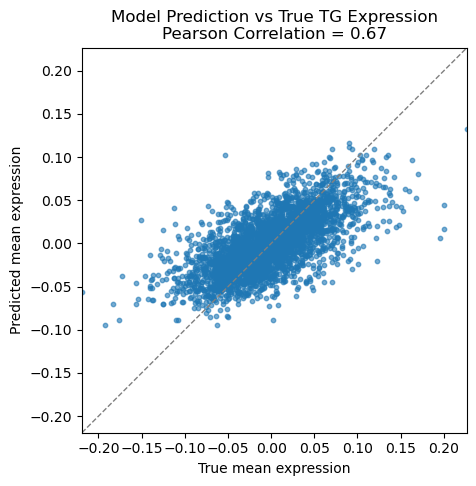

In [3]:
fig = exp.plot_true_vs_predicted_tg_expression(num_batches=25, rerun_forward_pass=True)
fig.show()

In [15]:
x = exp.tg_prediction_df.mean(axis=1).values
y = exp.tg_true_df.mean(axis=1).values

x = np.nan_to_num(x, nan=0.0, posinf=1e6, neginf=-1e6)
y = np.nan_to_num(y, nan=0.0, posinf=1e6, neginf=-1e6)

print("True min:", x.min())
print("Pred min:", y.min())


True min: -0.14524744
Pred min: -0.10361299


In [6]:
exp.tg_true_df.head()

,batch0_cell0,batch0_cell1,batch0_cell2,batch0_cell3,batch0_cell4,batch0_cell5,batch0_cell6,batch0_cell7,batch1_cell0,batch1_cell1,...,batch8_cell6,batch8_cell7,batch9_cell0,batch9_cell1,batch9_cell2,batch9_cell3,batch9_cell4,batch9_cell5,batch9_cell6,batch9_cell7
ADAMTSL4-AS1,-0.000097,0.004709,0.021687,0.003430,0.000102,0.027045,0.026824,0.020496,0.007051,-0.001036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADIPOR1,0.028828,0.005022,0.031483,0.012031,0.026649,0.036869,0.032276,0.029841,0.007219,0.023069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIDA,0.006035,-0.011320,-0.003087,-0.004260,0.005849,0.006528,-0.002676,-0.004745,-0.012780,0.004109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKT3,0.045411,0.043276,0.054056,0.042629,0.042895,0.061609,0.052700,0.054424,0.044904,0.043627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALDH4A1,0.002424,-0.004741,0.007337,-0.004679,0.003589,-0.004545,0.006344,0.008269,-0.003189,0.002739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


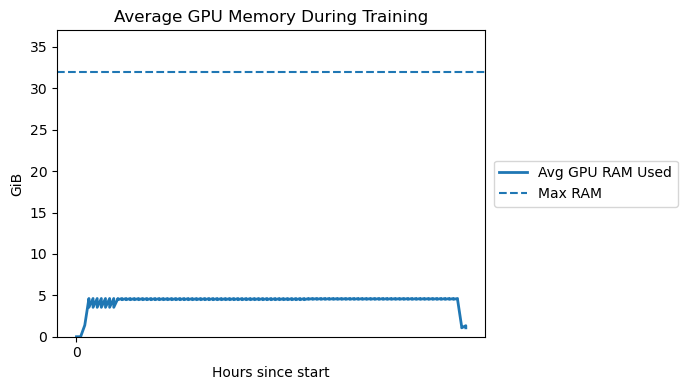

In [ ]:
fig = exp.plot_gpu_usage()
fig.show()

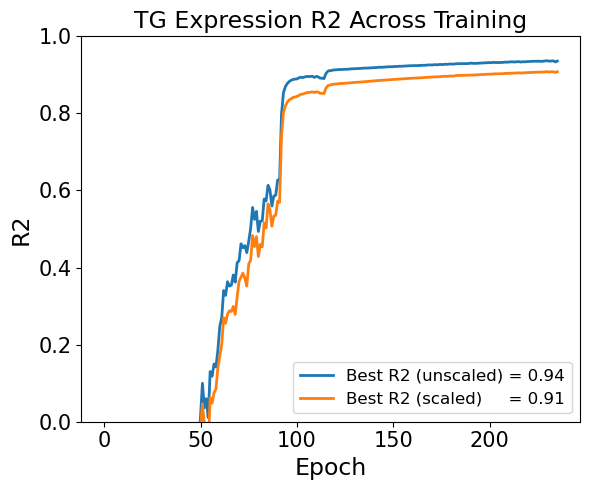

In [ ]:
fig = exp.plot_train_correlation()
fig.show()

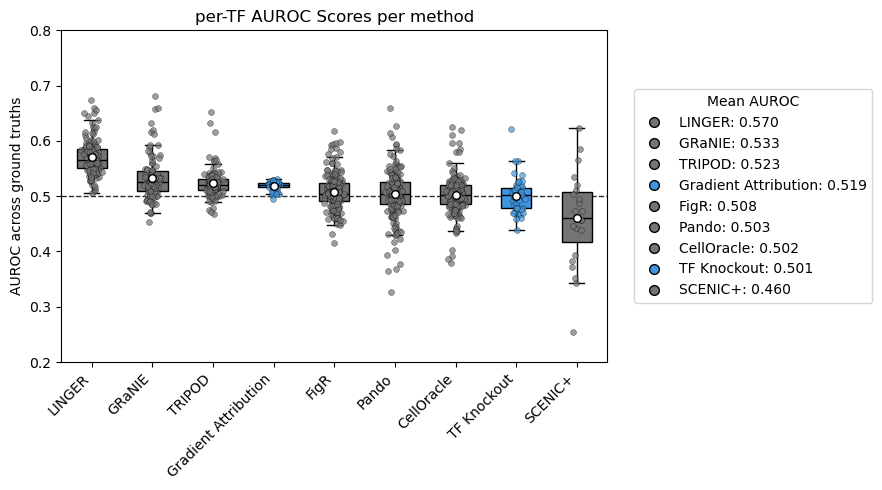

In [ ]:
fig = exp.plot_per_tf_auroc_boxplot(agg_by_gt=False, ylim=(0.2, 0.8))
fig.show()

In [ ]:
experiment_settings = exp.experiment_settings_df
experiment_settings

,parameter,value
0,EXPERIMENT_NAME,E8.5_rep1_hvg_filter_disp_0.2
1,DATASET_NAME,mESC_E8.5_rep1_hvg_filter_disp_0.2
2,ORGANISM_CODE,mm10
3,SAMPLE_NAMES,E8.5_rep1
4,VALIDATION_DATASETS,NaN
...,...,...
63,SHORTCUT_TOPK,NaN
64,SHORTCUT_DROPOUT,0.0
65,SUBSAMPLE_SEED,42
66,ALLOWED_SAMPLES,NaN


In [93]:
grad_df = exp.load_gradient_attribution()
grad_df

,Source,Target,Score_pooled,Score_per_tf
0,ADNP2,A2M,0.000040,39.626427
1,ADNP2,AACS,0.000175,174.975357
2,ADNP2,AAGAB,0.000149,148.542099
3,ADNP2,AAR2,0.000051,50.740742
4,ADNP2,AARS1,0.000072,71.875809
...,...,...,...,...
993040,ZSCAN30,ZSCAN30,0.002004,2006.307983
993041,ZSCAN30,ZSCAN5A,0.002400,2403.083496
993042,ZSCAN30,ZSWIM6,0.000199,198.874161
993043,ZSCAN30,ZSWIM7,0.000147,147.422989


In [ ]:
tf_ko_df = exp.load_tf_knockout()
tf_ko_df

,Source,Target,Score_pooled,Score_per_tf,counts
0,2010315B03RIK,1110002L01RIK,0.000000,0.000000,20
1,2010315B03RIK,1110019D14RIK,0.000018,18.100412,21
2,2010315B03RIK,1110046J04RIK,0.000000,0.000000,21
3,2010315B03RIK,1110059E24RIK,0.000003,2.882164,21
4,2010315B03RIK,1110065P20RIK,0.000000,0.000000,20
...,...,...,...,...,...
2567785,ZXDC,ZNHIT3,0.000000,-0.966789,21
2567786,ZXDC,ZSCAN21,0.000000,-0.966789,21
2567787,ZXDC,ZSWIM5,0.000000,-0.966789,21
2567788,ZXDC,ZSWIM6,0.000000,-0.966789,20


In [23]:
def load_ground_truth(ground_truth_file):
    if type(ground_truth_file) == str:
        ground_truth_file = Path(ground_truth_file)
        
    if ground_truth_file.suffix == ".csv":
        sep = ","
    elif ground_truth_file.suffix == ".tsv":
        sep="\t"
        
    ground_truth_df = pd.read_csv(ground_truth_file, sep=sep, on_bad_lines="skip", engine="python")
    
    if "chip" in ground_truth_file.name and "atlas" in ground_truth_file.name:
        ground_truth_df = ground_truth_df[["source_id", "target_id"]]

    if ground_truth_df.columns[0] != "Source" or ground_truth_df.columns[1] != "Target":
        ground_truth_df = ground_truth_df.rename(columns={ground_truth_df.columns[0]: "Source", ground_truth_df.columns[1]: "Target"})
    ground_truth_df["Source"] = ground_truth_df["Source"].astype(str).str.upper()
    ground_truth_df["Target"] = ground_truth_df["Target"].astype(str).str.upper()
        
    return ground_truth_df

GROUND_TRUTH_DIR = Path("data/ground_truth_files")

gt_by_dataset_dict = {
    "macrophage": {
        "RN204": load_ground_truth(GROUND_TRUTH_DIR / "rn204_macrophage_human_chipseq.tsv"),
        "ChIP-Atlas macrophage": load_ground_truth(GROUND_TRUTH_DIR / "chipatlas_macrophage.csv"),
    },
    "mESC": {
        "ChIP-Atlas mESC": load_ground_truth(GROUND_TRUTH_DIR / "chip_atlas_tf_peak_tg_dist.csv"),
        "RN111": load_ground_truth(GROUND_TRUTH_DIR / "RN111.tsv"),
        "RN112": load_ground_truth(GROUND_TRUTH_DIR / "RN112.tsv"),
        "RN114": load_ground_truth(GROUND_TRUTH_DIR / "RN114.tsv"),
        "RN116": load_ground_truth(GROUND_TRUTH_DIR / "RN116.tsv"),        
    },
    "K562": {
        "ChIP-Atlas K562": load_ground_truth(GROUND_TRUTH_DIR / "chipatlas_K562.csv"),
        "RN117": load_ground_truth(GROUND_TRUTH_DIR / "RN117.tsv"),        
    }
}

In [26]:
from importlib import reload

reload(experiment_loader)

<module 'multiomic_transformer.utils.experiment_loader' from '/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/src/multiomic_transformer/utils/experiment_loader.py'>

          GRN  Ground Truth ChIP-Atlas K562  Overlap (Score DF in GT)  \
TFs       272                           565                        96   
TGs      3223                         40153                      3205   
edges  876656                      17417550                    307680   

          AUROC     AUPRC  Pct of GRN in GT Pct of GT in GRN  
TFs    0.523152  0.336901             35.29           16.99%  
TGs         NaN       NaN             99.44            7.98%  
edges       NaN       NaN             35.10            1.77%  


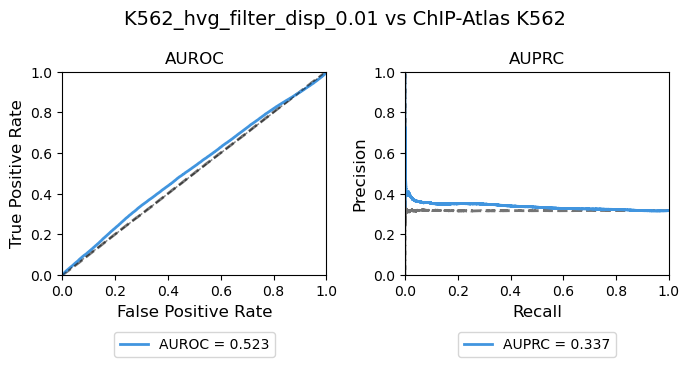

In [79]:
experiment_name = "K562_hvg_filter_disp_0.01"
ground_truth_name = "ChIP-Atlas K562"
gt_df = gt_by_dataset_dict["K562"][ground_truth_name]

exp = experiment_loader.ExperimentLoader(
    experiment_dir = "/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/",
    experiment_name=experiment_name,
    model_num=1,
)

# gt_df = exp.load_ground_truth(ground_truth_file)
# grad_df = exp.original_load_gradient_attribution_matrix()

# new_grad_df = exp.load_gradient_attribution()

new_grad_median_df = exp.load_gradient_attribution_median()

# new_grad_mean_df = new_grad_df.copy()
# new_grad_mean_df["Score_pooled"] = new_grad_mean_df["Score_per_tf"]

# grad_df["Score_pooled"] = grad_df["Score"] 
# original_fig, overlap_info_df = exp.plot_auroc_auprc(
#     grad_df, 
#     gt_df, 
#     ground_truth_name=ground_truth_name, 
#     return_overlap_info=True,
#     balance_auroc=True,
#     balance_auprc=False,
#     )
# original_fig.show()

# new_fig, overlap_info_df = exp.plot_auroc_auprc(
#     new_grad_df, 
#     gt_df, 
#     ground_truth_name=ground_truth_name, 
#     return_overlap_info=True,
#     balance_auroc=True,
#     balance_auprc=False,
#     )
# new_fig.show()

new_grad_median_df["Score_pooled"] = new_grad_median_df["Score"]
new_fig_median, overlap_info_df = exp.plot_auroc_auprc(
    new_grad_median_df, 
    gt_df, 
    ground_truth_name=ground_truth_name, 
    return_overlap_info=True,
    balance_auroc=True,
    balance_auprc=False,
    )
new_fig_median.show()



# fig_dir = os.path.join(exp.experiment_dir, exp.experiment_name, ground_truth_name)
# if not os.path.exists(fig_dir):
#     os.makedirs(fig_dir)
# auroc_fig_path = os.path.join(fig_dir, f"{ground_truth_name}_auroc_auprc.png")

# new_figfig.savefig(auroc_fig_path, dpi=300)
print(overlap_info_df)

In [29]:
experiments = [
    "Macrophage_buffer_1_hvg_filter_disp_0.01",
    "Macrophage_buffer_2_hvg_filter_disp_0.01",
    "Macrophage_buffer_3_hvg_filter_disp_0.01",
    "Macrophage_buffer_4_hvg_filter_disp_0.01",
    # "Macrophage_buffer_2_hvg_filter_none",
    # "Macrophage_buffer_1_best_settings",
    # "Macrophage_buffer_2_best_settings",
    # "Macrophage_all_bnchmk_best_settings",
    "mESC_E7.5_rep1_hvg_filter_disp_0.01",
    # "mESC_E7.5_rep1_hvg_filter_disp_0.5",
    # "mESC_E7.5_rep2_hvg_filter_disp_0.01",
    "mESC_E7.5_rep2_hvg_filter_disp_0.5",
    "mESC_E8.5_rep1_hvg_filter_disp_0.01",
    "mESC_E8.5_rep1_hvg_filter_disp_0.5",
    "mESC_E8.5_rep2_hvg_filter_disp_0.01",
    "mESC_E8.5_rep2_hvg_filter_disp_0.5",
    # "mESC_E7.5_rep1_best_settings",
    # "mESC_E7.5_rep2_best_settings",
    # "mESC_E8.5_rep1_best_settings",
    "K562_hvg_filter_disp_0.01",
    "K562_hvg_filter_disp_0.5",
    "K562_hvg_filter_none",
    # "K562_sample_1_best_settings"
]

all_gt_results = []
for experiment_name in experiments:
    print(f"Processing experiment: {experiment_name}")
    if "macrophage" in experiment_name.lower():
        gt_dict = gt_by_dataset_dict["macrophage"]
        sample_type = "Macrophage"
    elif "mesc" in experiment_name.lower():
        gt_dict = gt_by_dataset_dict["mESC"]
        sample_type = "mESC"
    elif "k562" in experiment_name.lower():
        gt_dict = gt_by_dataset_dict["K562"]
        sample_type = "K562"
        
    exp = experiment_loader.ExperimentLoader(
        experiment_dir = "/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/",
        experiment_name=experiment_name,
        model_num=1,
    )

    grad_df = exp.load_gradient_attribution()
    orig_grad_df = exp.original_load_gradient_attribution_matrix()
    new_grad_median_df = exp.load_gradient_attribution_median()
    
    new_grad_median_df["Score_pooled"] = new_grad_median_df["Score"]
    orig_grad_df["Score_pooled"] = orig_grad_df["Score"]
        
    for gt_name, gt_df in gt_dict.items():
        print(f"  - Processing ground truth: {gt_name}")
        fig, overlap_info_df = exp.plot_auroc_auprc(
            grad_df, 
            gt_df, 
            ground_truth_name=gt_name, 
            return_overlap_info=True,
            balance_auprc=True,
            no_fig=True,
            )
        fig, orig_overlap_info_df = exp.plot_auroc_auprc(
            orig_grad_df, 
            gt_df, 
            ground_truth_name=gt_name, 
            return_overlap_info=True,
            balance_auprc=True,
            no_fig=True,
            )
        fig, median_overlap_info_df = exp.plot_auroc_auprc(
            new_grad_median_df, 
            gt_df, 
            ground_truth_name=gt_name, 
            return_overlap_info=True,
            balance_auprc=True,
            no_fig=True,
            )

        results_dict = {
            "sample_type": sample_type,
            "experiment": experiment_name,
            "ground_truth": gt_name,
            "new_auroc": overlap_info_df.loc["TFs", "AUROC"],
            "new_auprc": overlap_info_df.loc["TFs", "AUPRC"],
            "original_auroc": orig_overlap_info_df.loc["TFs", "AUROC"],
            "original_auprc": orig_overlap_info_df.loc["TFs", "AUPRC"],
            "median_auroc": median_overlap_info_df.loc["TFs", "AUROC"],
            "median_auprc": median_overlap_info_df.loc["TFs", "AUPRC"],
            "num_tf_in_gt": overlap_info_df.loc["TFs", "Overlap (Score DF in GT)"],
            "pct_tf_overlap": overlap_info_df.loc["TFs", "Pct of GRN in GT"],
            "pct_tg_overlap": overlap_info_df.loc["TGs", "Pct of GRN in GT"],
            "pct_edges_in_gt": overlap_info_df.loc["edges", "Pct of GRN in GT"],
            
        }

        results_df = pd.DataFrame(results_dict, index=[0])
        all_gt_results.append(results_df)
        
        # fig_dir = os.path.join(exp.experiment_dir, exp.experiment_name, gt_name)
        # if not os.path.exists(fig_dir):
        #     os.makedirs(fig_dir)
        # auroc_fig_path = os.path.join(fig_dir, f"{gt_name}_auroc_auprc.png")

        # fig.savefig(auroc_fig_path, dpi=300)
        # plt.close(fig)

full_results_df = pd.concat(all_gt_results, axis=0)
full_results_df


Processing experiment: Macrophage_buffer_1_hvg_filter_disp_0.01
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas macrophage
Processing experiment: Macrophage_buffer_2_hvg_filter_disp_0.01
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas macrophage
Processing experiment: Macrophage_buffer_3_hvg_filter_disp_0.01
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas macrophage
Processing experiment: Macrophage_buffer_4_hvg_filter_disp_0.01
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas macrophage
Processing experiment: mESC_E7.5_rep1_hvg_filter_disp_0.01
  - Processing ground truth: ChIP-Atlas mESC
  - Processing ground truth: RN111
  - Processing ground truth: RN112
  - Processing ground truth: RN114
  - Processing ground truth: RN116
Processing experiment: mESC_E7.5_rep2_hvg_filter_disp_0.5
  - Processing ground truth: ChIP-Atlas mESC
  - Processing ground truth: RN111
  - Processing gro

Processing experiment: K562_hvg_filter_none
  - Processing ground truth: ChIP-Atlas K562
  - Processing ground truth: RN117


,sample_type,experiment,ground_truth,new_auroc,new_auprc,original_auroc,original_auprc,median_auroc,median_auprc,num_tf_in_gt,pct_tf_overlap,pct_tg_overlap,pct_edges_in_gt
0,Macrophage,Macrophage_buffer_1_hvg_filter_disp_0.01,RN204,0.685743,0.652836,0.492170,0.533609,0.511712,0.524571,9,2.72,99.08,2.69
0,Macrophage,Macrophage_buffer_1_hvg_filter_disp_0.01,ChIP-Atlas macrophage,0.600524,0.579209,0.465459,0.519212,0.558808,0.547292,9,2.72,97.38,2.65
0,Macrophage,Macrophage_buffer_2_hvg_filter_disp_0.01,RN204,0.337747,0.415797,0.568213,0.567351,0.538340,0.540186,3,1.08,99.36,1.08
0,Macrophage,Macrophage_buffer_2_hvg_filter_disp_0.01,ChIP-Atlas macrophage,0.348732,0.394673,0.548140,0.543614,0.564808,0.536640,4,1.44,97.10,1.40
0,Macrophage,Macrophage_buffer_3_hvg_filter_disp_0.01,RN204,0.612460,0.641122,0.679332,0.652548,0.408228,0.467977,7,2.57,99.16,2.55
0,Macrophage,Macrophage_buffer_3_hvg_filter_disp_0.01,ChIP-Atlas macrophage,0.530362,0.585462,0.724330,0.687298,0.390963,0.456277,6,2.21,97.57,2.15
0,Macrophage,Macrophage_buffer_4_hvg_filter_disp_0.01,RN204,0.520955,0.493352,0.484058,0.515136,0.523520,0.519265,9,2.81,99.28,2.79
0,Macrophage,Macrophage_buffer_4_hvg_filter_disp_0.01,ChIP-Atlas macrophage,0.496312,0.477263,0.503604,0.519988,0.502873,0.503837,9,2.81,97.58,2.74
0,mESC,mESC_E7.5_rep1_hvg_filter_disp_0.01,ChIP-Atlas mESC,0.621986,0.603758,0.525675,0.547917,0.564924,0.555871,48,10.02,97.62,9.78
0,mESC,mESC_E7.5_rep1_hvg_filter_disp_0.01,RN111,0.615444,0.606991,0.503239,0.522693,0.547901,0.535125,36,7.52,92.37,6.94


In [39]:
full_results_df["AUROC Improvement"] = (
    full_results_df["new_auroc"] - full_results_df["original_auroc"]
)

def plot_auroc_improvement_boxplot(
    full_results_df, 
    column="AUROC Improvement", 
    title="AUROC Difference between New and Original Gradient Attribution Method",
    hbar_y=0,
    ylim=(-0.3, 0.3)
    ):
    # ---- group data by ground_truth ----
    groups = full_results_df.groupby("ground_truth")[column]
    labels = groups.groups.keys()
    data = [groups.get_group(g).values for g in labels]

    color_dict = {
        "ChIP-Atlas mESC": "#da8b47",
        "ChIP-Atlas macrophage": "#e67d5f",
        "ChIP-Atlas K562": "#dab45d",
        "RN111": "#71c071",
        "RN112": "#ba4444",
        "RN114": "#cbb4e1",
        "RN116": "#91645b",
        "RN117": "#d8aacb",
        "RN204": "#9ec5e1",
    }

    means = [np.mean(groups.get_group(g)) for g in labels]

    plt.figure(figsize=(10, 6))
    # ---- boxplot ----
    bp = plt.boxplot(
        data,
        patch_artist=True,
        showfliers=False,
        zorder=1,
    )

    plt.axhline(hbar_y, color="#747474", linestyle="--")


    # ---- color boxes ----
    for label, box in zip(labels, bp["boxes"]):
        box.set_facecolor(color_dict.get(label, "#4195df"))
    for median in bp["medians"]:
        median.set_color("black")

    # ---- scatter points ----
    for i, g in enumerate(labels, start=1):
        yvals = groups.get_group(g).values
        xvals = np.random.normal(i, 0.05, size=len(yvals))  # jitter per box
        
        plt.scatter(
            xvals,
            yvals,
            color=color_dict.get(g, "#4195df"),
            alpha=0.7,
            s=40,
            edgecolor="k",
            zorder=2
        )

    # ---- plot mean per ground_truth ----

    plt.scatter(
        range(1, len(means) + 1),
        means,
        color="white",
        s=60,
        edgecolor="k",
        zorder=3,
    )

    # ---- formatting ----
    plt.xticks(range(1, len(labels) + 1), labels, rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel(f"{column}\n(per experiment)", fontsize=14)
    plt.title(f"{title}", fontsize=14)

    # ---- plot mean per ground_truth + build legend ----
    legend_handles = []

    for i, (g, m) in enumerate(zip(labels, means), start=1):
        h = plt.scatter(
            i,
            m,
            color="white",
            s=70,
            edgecolor="k",
            zorder=3,
            label=f"{g} mean = {m:.3f}"
        )
        legend_handles.append(h)


    plt.legend(
        handles=legend_handles,
        bbox_to_anchor=(1.02, 0.75),
        loc="upper left",
        frameon=False,
        fontsize=12,
        title="Mean Difference in AUROC",
        title_fontsize=14,
    )

    plt.ylim(ylim)
    plt.tight_layout()
    plt.show()


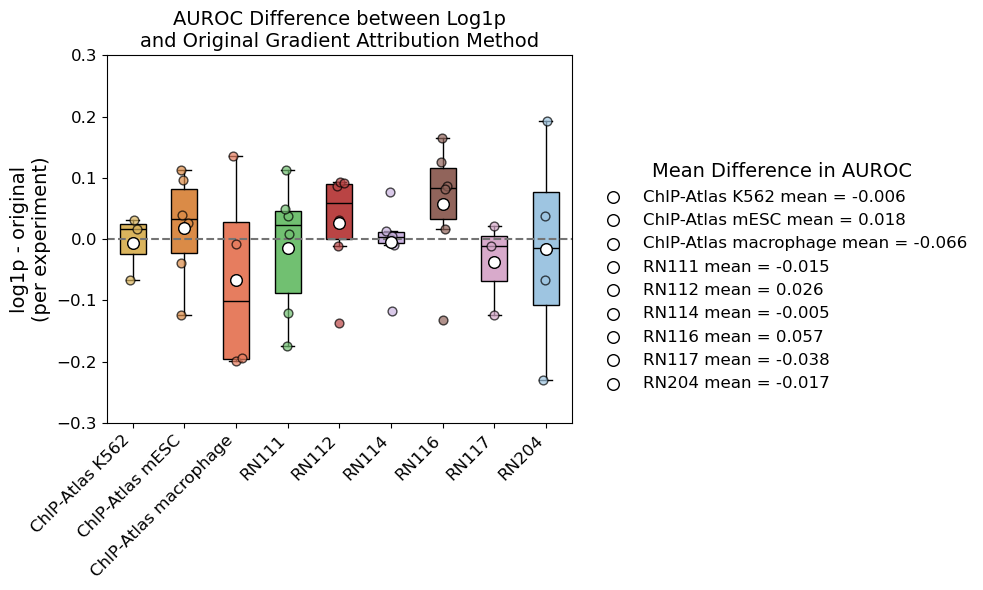

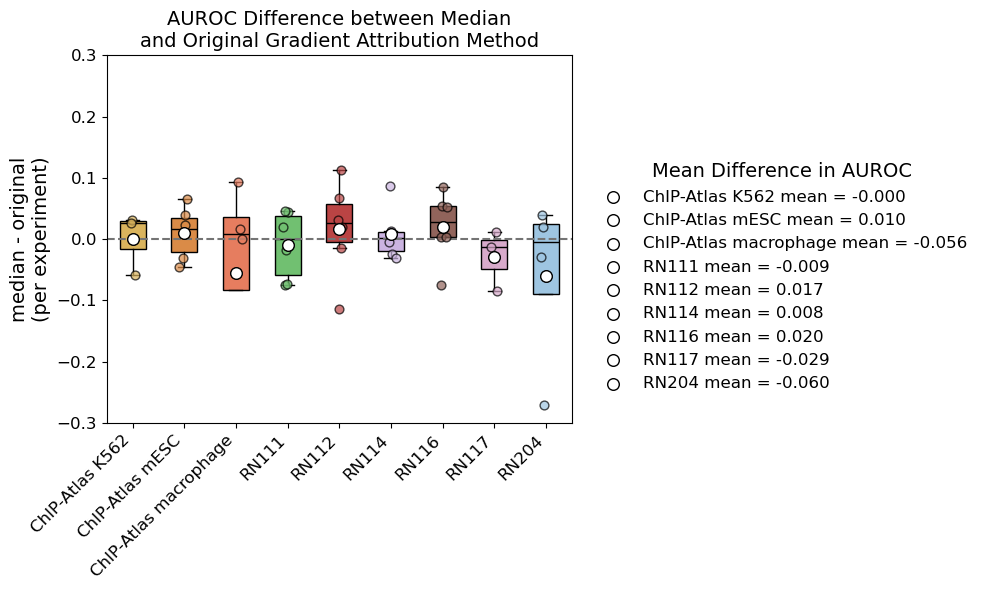

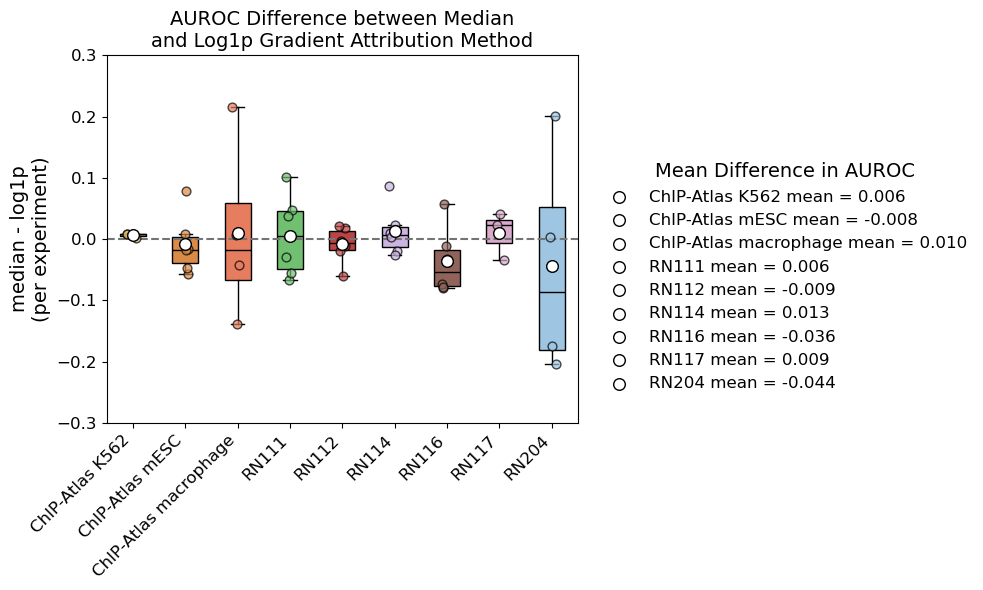

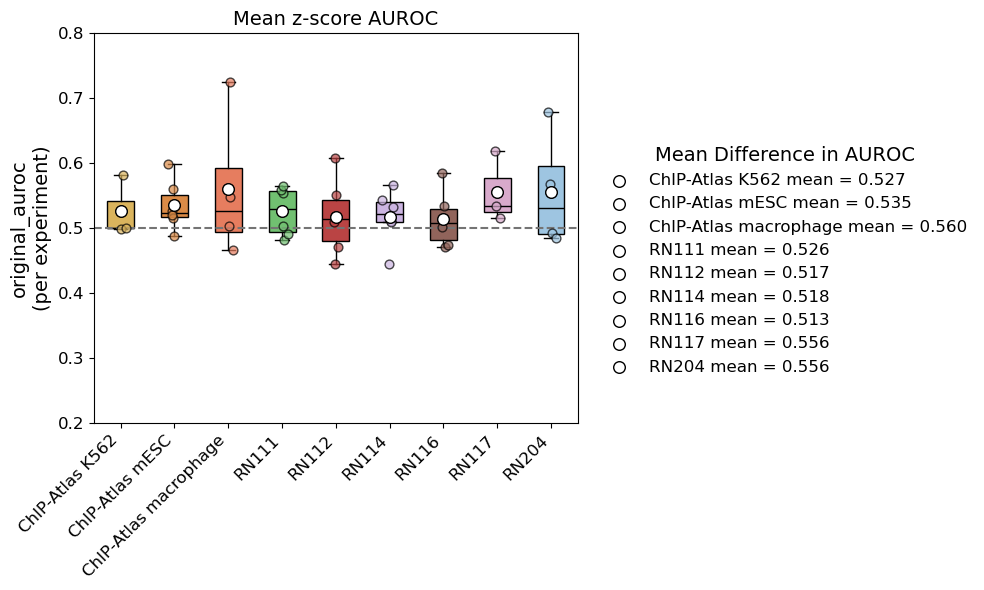

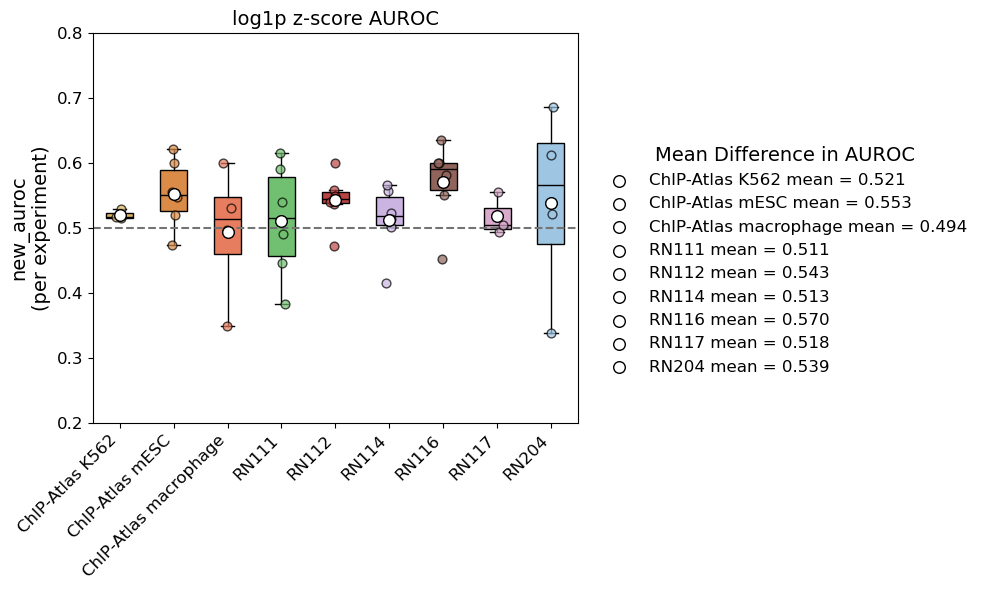

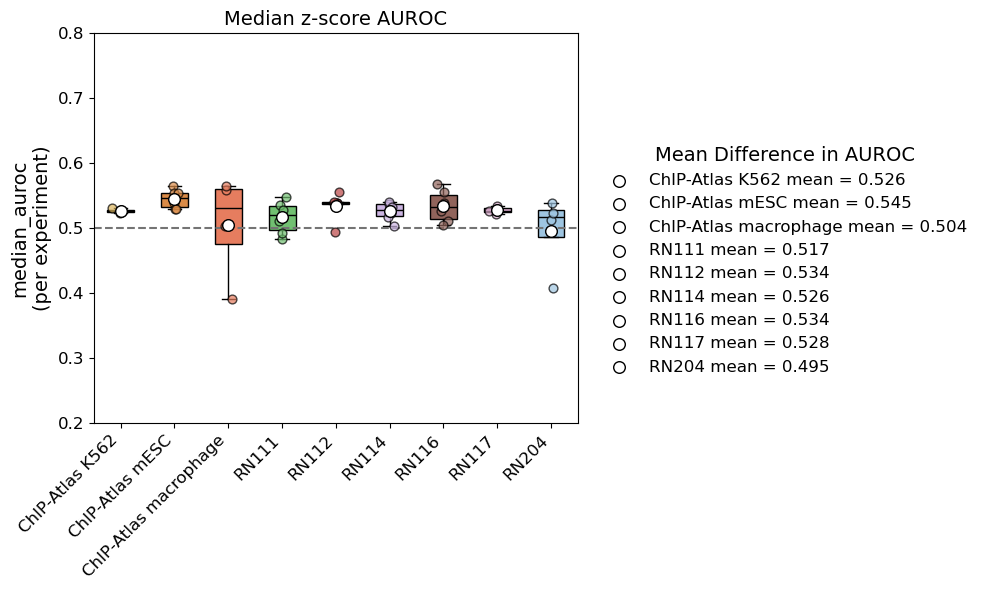

In [41]:
full_results_df["log1p - original"] = full_results_df["new_auroc"] -full_results_df["original_auroc"]
full_results_df["median - original"] = full_results_df["median_auroc"] - full_results_df["original_auroc"]
full_results_df["median - log1p"] = full_results_df["median_auroc"] - full_results_df["new_auroc"]
plot_auroc_improvement_boxplot(
    full_results_df, 
    column="log1p - original", 
    title="AUROC Difference between Log1p\nand Original Gradient Attribution Method",
    hbar_y=0,
    ylim=(-0.3, 0.3)
    )

plot_auroc_improvement_boxplot(
    full_results_df, 
    column="median - original", 
    title="AUROC Difference between Median\nand Original Gradient Attribution Method",
    hbar_y=0,
    ylim=(-0.3, 0.3)
    )

plot_auroc_improvement_boxplot(
    full_results_df, 
    column="median - log1p", 
    title="AUROC Difference between Median\nand Log1p Gradient Attribution Method",
    hbar_y=0,
    ylim=(-0.3, 0.3)
    )


plot_auroc_improvement_boxplot(
    full_results_df, 
    column="original_auroc", 
    title="Mean z-score AUROC",
    hbar_y=0.5,
    ylim=(0.2, 0.8)
    )

plot_auroc_improvement_boxplot(
    full_results_df, 
    column="new_auroc", 
    title="log1p z-score AUROC",
    hbar_y=0.5,
    ylim=(0.2, 0.8)
    )

plot_auroc_improvement_boxplot(
    full_results_df, 
    column="median_auroc", 
    title="Median z-score AUROC",
    hbar_y=0.5,
    ylim=(0.2, 0.8)
    )

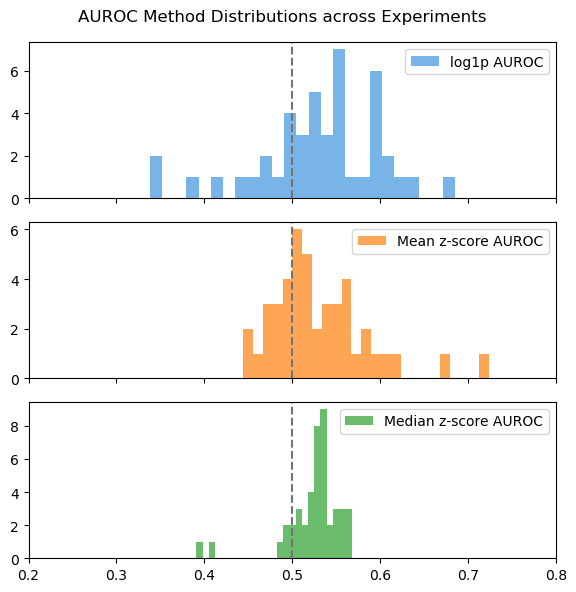

In [75]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 6), sharex=True)

ax[0].hist(full_results_df["new_auroc"], bins=25, color="#4195df", alpha=0.7, label="log1p AUROC")
ax[0].axvline(0.5, color="#747474", linestyle="--")
ax[0].legend()


ax[1].hist(full_results_df["original_auroc"], bins=25, color="#ff7f0e", alpha=0.7, label="Mean z-score AUROC")
ax[1].axvline(0.5, color="#747474", linestyle="--")
ax[1].legend()

ax[2].hist(full_results_df["median_auroc"], bins=25, color="#2ca02c", alpha=0.7, label="Median z-score AUROC")
ax[2].axvline(0.5, color="#747474", linestyle="--")
ax[2].legend()

ax[2].set_xlim(0.2, 0.8)

plt.suptitle("AUROC Method Distributions across Experiments")
plt.tight_layout()
plt.show()


/tmp/ipykernel_89845/1256396908.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(full_results_df["new_auroc"], positions=[0], labels=["log1p AUROC"])
/tmp/ipykernel_89845/1256396908.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()
/tmp/ipykernel_89845/1256396908.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(full_results_df["original_auroc"], positions=[0], labels=["Mean z-score AUROC"])
/tmp/ipykernel_89845/1256396908.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend(

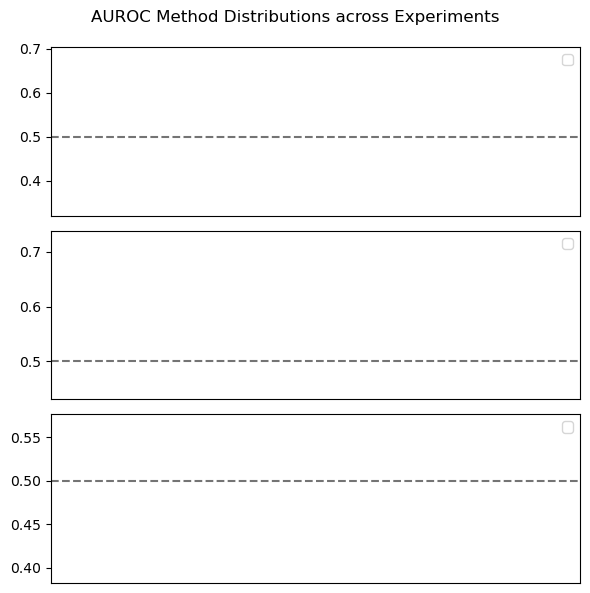

In [76]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 6), sharex=True)

ax[0].boxplot(full_results_df["new_auroc"], positions=[0], labels=["log1p AUROC"])
ax[0].axhline(0.5, color="#747474", linestyle="--")
ax[0].legend()


ax[1].boxplot(full_results_df["original_auroc"], positions=[0], labels=["Mean z-score AUROC"])
ax[1].axhline(0.5, color="#747474", linestyle="--")
ax[1].legend()

ax[2].boxplot(full_results_df["median_auroc"], positions=[0], labels=["Median z-score AUROC"])
ax[2].axhline(0.5, color="#747474", linestyle="--")
ax[2].legend()

ax[2].set_xlim(0.2, 0.8)

plt.suptitle("AUROC Method Distributions across Experiments")
plt.tight_layout()
plt.show()


In [44]:
print(full_results_df[["new_auroc", "original_auroc", "median_auroc"]].describe())

new_auroc_grouped_by_gt = full_results_df.groupby("ground_truth")["new_auroc"].mean()
print("\nlog1p AUROC grouped by ground truth")
print(new_auroc_grouped_by_gt.describe())

print("\nMean z-score AUROC grouped by ground truth")
old_auroc_grouped_by_gt = full_results_df.groupby("ground_truth")["original_auroc"].mean()
print(old_auroc_grouped_by_gt.describe())

print("\nMedian z-score AUROC grouped by ground truth")
median_auroc_grouped_by_gt = full_results_df.groupby("ground_truth")["median_auroc"].mean()
print(median_auroc_grouped_by_gt.describe())


       new_auroc  original_auroc  median_auroc
count  44.000000       44.000000     44.000000
mean    0.531560        0.531079      0.524777
std     0.072362        0.056206      0.033955
min     0.337747        0.444277      0.390963
25%     0.499916        0.497093      0.515252
50%     0.538531        0.517247      0.529974
75%     0.584649        0.558722      0.539139
max     0.685743        0.724330      0.567605

log1p AUROC grouped by ground truth
count    9.000000
mean     0.529093
std      0.024012
min      0.493983
25%      0.512668
50%      0.520513
75%      0.542852
max      0.570452
Name: new_auroc, dtype: float64

Mean z-score AUROC grouped by ground truth
count    9.000000
mean     0.534254
std      0.018596
min      0.513487
25%      0.517747
50%      0.526902
75%      0.555944
max      0.560384
Name: original_auroc, dtype: float64

Median z-score AUROC grouped by ground truth
count    9.000000
mean     0.523187
std      0.015422
min      0.495450
25%      0.516544
50%

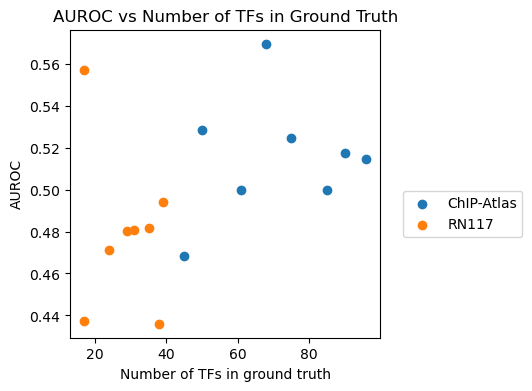

In [213]:
# Scatterplot of auroc vs percent of tf overlap in gt
plt.figure(figsize=(4,4))
df = full_results_df[full_results_df["sample_type"] == "K562"]
for gt_name in df["ground_truth"].unique():
    subset = df[df["ground_truth"] == gt_name]
    plt.scatter(subset["num_tf_in_gt"], subset["auroc"], label=gt_name)
plt.title("AUROC vs Number of TFs in Ground Truth")
plt.xlabel("Number of TFs in ground truth")
plt.ylabel("AUROC")
plt.legend(
    bbox_to_anchor=(1.05, 0.5), loc='upper left'
)
plt.show()

In [173]:
exp.load_eval_results()
results_df = exp.results_df[exp.results_df["method"] == "Gradient Attribution"]
results_df = results_df[["method", "gt", "auroc", "auprc"]]
results_df

,method,gt,auroc,auprc
14,Gradient Attribution,ChIP-Atlas,0.347903,0.394673
15,Gradient Attribution,RN204,0.334909,0.415797


In [97]:

exp.df_with_ground_truth.head()
ground_truth_df = exp.load_ground_truth(ground_truth_file)


print("----- SCORE DF  OVERLAP WITH GROUND TRUTH-----")
print(f"Total TFs in score df: {grad_df['Source'].nunique():,}")
print(f"Total TGs in score df: {grad_df['Target'].nunique():,}")
print(f"Total edges in score df: {len(grad_df):,}")
print()

num_true = exp.df_with_ground_truth["_in_gt"].sum()
num_false = len(exp.df_with_ground_truth) - num_true
print(f"Score TFs in ground truth: {exp.df_with_ground_truth['Source'].nunique():,}")
print(f"Score TGs in ground truth: {exp.df_with_ground_truth['Target'].nunique():,}")
print(f"Score edges in ground truth: {len(exp.df_with_ground_truth):,}")
print(f"  - True edges: {int(num_true):,}")
print(f"  - False edges: {int(num_false):,}")
print()


print("----- GROUND TRUTH OVERLAP WITH SCORE DF -----")
print(f'Total TFs in ground truth: {ground_truth_df["Source"].nunique():,}')
print(f'Total TGs in ground truth: {ground_truth_df["Target"].nunique():,}')
print(f'Total edges in ground truth: {len(ground_truth_df):,}')
print()

score_df_tfs = set(grad_df["Source"])
score_df_tgs = set(grad_df["Target"])
missing_df = ground_truth_df[~ground_truth_df["Source"].isin(score_df_tfs) & ~ground_truth_df["Target"].isin(score_df_tgs)].copy()
print(f"Ground truth TFs not in score df: {missing_df['Source'].nunique():,}")
print(f"Ground truth TGs not in score df: {missing_df['Target'].nunique():,}")
print(f"Ground truth edges not in score df: {len(missing_df):,}")
print()

----- SCORE DF  OVERLAP WITH GROUND TRUTH-----
Total TFs in score df: 277
Total TGs in score df: 3,585
Total edges in score df: 993,045

Score TFs in ground truth: 4
Score TGs in ground truth: 3,481
Score edges in ground truth: 27,848
  - True edges: 10,032
  - False edges: 17,816

----- GROUND TRUTH OVERLAP WITH SCORE DF -----
Total TFs in ground truth: 24
Total TGs in ground truth: 37,851
Total edges in ground truth: 2,500,303

Ground truth TFs not in score df: 20
Ground truth TGs not in score df: 34,267
Ground truth edges not in score df: 1,911,442



In [ ]:
tg_expr_pred_df, tg_expr_true_df = exp.run_forward_pass(num_batches=15)

predicted_expr = tg_expr_pred_df.copy()
predicted_expr["mean_expr"] = predicted_expr.mean(axis=1).values
predicted_expr["std_expr"] = predicted_expr.std(axis=1).values
predicted_expr = predicted_expr[["mean_expr", "std_expr"]]

true_expr = tg_expr_true_df
true_expr["mean_expr"] = true_expr.mean(axis=1).values
true_expr["std_expr"] = true_expr.std(axis=1).values
true_expr = true_expr[["mean_expr", "std_expr"]]

merged = predicted_expr.merge(
    true_expr,
    left_index=True,
    right_index=True,
    suffixes=("_pred", "_true")
)

merged["diff"] = merged["mean_expr_pred"] - merged["mean_expr_true"]

merged

,mean_expr_pred,std_expr_pred,mean_expr_true,std_expr_true,diff
1700025G04RIK,0.581790,0.140557,0.501269,0.033464,0.080521
1700034P13RIK,0.268288,0.052224,0.229964,0.006849,0.038323
CRACDL,0.003775,0.012771,0.008374,0.000495,-0.004599
2310009B15RIK,0.047540,0.013995,0.047998,0.000405,-0.000458
4930444P10RIK,0.009208,0.008202,0.013811,0.000299,-0.004603
...,...,...,...,...,...
WNT6,0.144629,0.074681,0.122165,0.019122,0.022464
XKR4,0.568969,0.133240,0.489097,0.126019,0.079872
XPR1,0.435321,0.101225,0.607469,0.083148,-0.172148
ZDBF2,0.389615,0.076216,0.420550,0.044066,-0.030936


0.8152525373815609


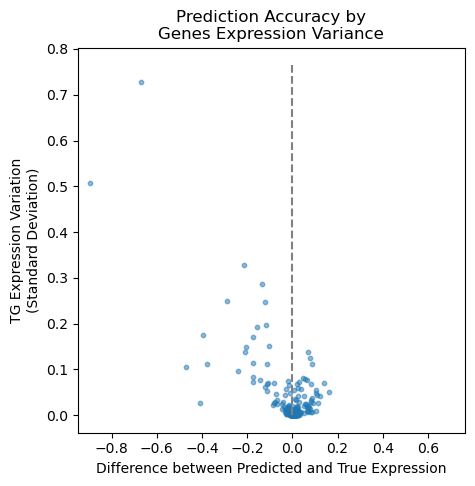

In [ ]:
fig = plt.figure(figsize=(5,5))

plt.scatter(merged["diff"], merged["std_expr_true"], alpha=0.5, s=10)

lims = [
    np.min([plt.xlim()[0], plt.ylim()[0]]),  # min of both axes
    np.max([plt.xlim()[1], plt.ylim()[1]]),  # max of both axes
]
plt.vlines(x=0, ymin=0, ymax=lims[1], colors='grey', linestyles='dashed', label="Perfect Prediction")
plt.xlim(lims)
plt.title("Prediction Accuracy by\nGenes Expression Variance")
plt.xlabel("Difference between Predicted and True Expression")
plt.ylabel("TG Expression Variation\n(Standard Deviation)")
print(np.corrcoef(np.abs(merged["diff"]), merged["std_expr_true"])[0,1])

plt.show()

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Range1d, ColumnDataSource, HoverTool

output_notebook()

# Make sure gene names are in a column (NOT just the pandas index)
merged2 = merged.reset_index().rename(columns={"index": "gene"})
merged2["diff"] = np.abs(merged2["diff"])
source = ColumnDataSource(merged2)

lo = float(min(merged2["mean_expr_pred"].min(), merged2["mean_expr_true"].min()))
hi = float(max(merged2["mean_expr_pred"].max(), merged2["mean_expr_true"].max()))

p = figure(
    width=400,
    height=400,
    tools="pan,wheel_zoom,reset",
    x_axis_label="Predicted TG Expression",
    y_axis_label="True TG Expression",
)

scatter_renderer = p.scatter(
    x="mean_expr_pred",
    y="mean_expr_true",
    source=source,
    size=6,
    alpha=0.7
)

# Add hover with your tooltips
hover = HoverTool(
    renderers=[scatter_renderer],   # <<< restrict hover here
    tooltips=[
        ("Gene", "@gene"),
        ("Pred", "@mean_expr_pred{0.000}"),
        ("True", "@mean_expr_true{0.000}"),
    ],
)
p.add_tools(hover)

p.line([lo, hi], [lo, hi])  # 1:1 line

pad = 0.15 * (hi - lo)
p.x_range = Range1d(lo, hi, bounds=(lo - pad, hi + pad))
p.y_range = Range1d(lo, hi, bounds=(lo - pad, hi + pad))

show(p)


Loading BokehJS ...